In [1]:
import sys
import numpy as np
from tqdm import tqdm
#!{sys.executable} -m pip install nilearn #install relevant package
from preprocessing import load_and_mask_miyawaki_data, plt_background

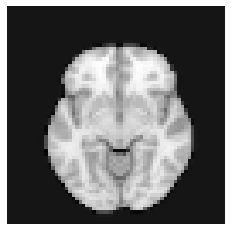

In [2]:
#Plot the pretty brain we are working on
plt_background()

In [3]:
fmri_data, stimuli, masker = load_and_mask_miyawaki_data()

Preprocessing data...

Preprocessed fMRI data: 2860 samples x 5438 voxels
Preprocessed stimuli data: 2860 samples x 100 pixels


 Done (13.89s).


## First step: Decoding


Let's infer the binary visual stimulus presented to the subject from the recorded fMRI data.

Simple classification: X = fMRI data, y = binary stimuli

As done in Abraham et al., we first use a l1 logistic regression

Issue: the article is from 2014, so some of the code is deprecated: need to correct it

In [4]:
"""from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

pipeline_LR = Pipeline(steps=[('selection', SelectKBest(f_classif, k=500)),('clf', LR(penalty='l1', C=0.05))])

scores_lr = []
# y_train = n_samples x n_voxels
# To iterate on voxels, we transpose it. 
for pixel in tqdm(y_train.T):
    score = cross_val_score(pipeline_LR, X_train, pixel, cv=5)
    scores_lr.append(score)"""

"from sklearn.linear_model import LogisticRegression as LR\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.feature_selection import SelectKBest, f_classif\n\npipeline_LR = Pipeline(steps=[('selection', SelectKBest(f_classif, k=500)),('clf', LR(penalty='l1', C=0.05))])\n\nscores_lr = []\n# y_train = n_samples x n_voxels\n# To iterate on voxels, we transpose it. \nfor pixel in tqdm(y_train.T):\n    score = cross_val_score(pipeline_LR, X_train, pixel, cv=5)\n    scores_lr.append(score)"

In [4]:
from sklearn.model_selection import train_test_split

train_to_test_ratio = 0.8
X_train, X_test, Y_train, Y_test =train_test_split(fmri_data, stimuli, 
                                        train_size=train_to_test_ratio, 
                                        test_size=1.0-train_to_test_ratio)

In [19]:
from sklearn import linear_model

C_list = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]

logreg_table = []
train_accuracy, test_accuracy = np.zeros(100), np.zeros(100)
# loop over regularisation strength

for i,pixel in tqdm(enumerate(np.transpose(Y_train))):
    
    # define logistic regressor
    logreg = linear_model.LogisticRegression(penalty='l2', C=0.05, max_iter = 1500)
    
    # fit training data
    logreg.fit(X_train, pixel)
    
    logreg_table.append(logreg)
    
    # check accuracy
    train_accuracy[i]=logreg.score(X_train,pixel)
    test_accuracy[i]=logreg.score(X_test,np.transpose(Y_test)[i])
    
    print('accuracy: train, test')
    print('liblin: %0.4f, %0.4f' %(train_accuracy[i],test_accuracy[i]) )

1it [00:07,  7.38s/it]

accuracy: train, test
liblin: 1.0000, 0.7902


2it [00:14,  7.07s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


3it [00:23,  8.21s/it]

accuracy: train, test
liblin: 1.0000, 0.8252


4it [00:30,  7.72s/it]

accuracy: train, test
liblin: 1.0000, 0.7885


5it [00:37,  7.30s/it]

accuracy: train, test
liblin: 1.0000, 0.8112


6it [00:44,  7.29s/it]

accuracy: train, test
liblin: 1.0000, 0.8024


7it [00:51,  7.25s/it]

accuracy: train, test
liblin: 1.0000, 0.7797


8it [00:58,  7.08s/it]

accuracy: train, test
liblin: 1.0000, 0.8094


9it [01:06,  7.46s/it]

accuracy: train, test
liblin: 1.0000, 0.8252


10it [01:16,  8.19s/it]

accuracy: train, test
liblin: 1.0000, 0.8059


11it [01:25,  8.34s/it]

accuracy: train, test
liblin: 1.0000, 0.7937


12it [01:33,  8.22s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


13it [01:41,  8.19s/it]

accuracy: train, test
liblin: 1.0000, 0.8357


14it [01:48,  7.99s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


15it [02:00,  9.18s/it]

accuracy: train, test
liblin: 1.0000, 0.8147


16it [02:08,  8.60s/it]

accuracy: train, test
liblin: 1.0000, 0.8444


17it [02:14,  8.03s/it]

accuracy: train, test
liblin: 1.0000, 0.8584


18it [02:22,  7.83s/it]

accuracy: train, test
liblin: 1.0000, 0.8374


19it [02:38, 10.35s/it]

accuracy: train, test
liblin: 1.0000, 0.7955


20it [02:45,  9.37s/it]

accuracy: train, test
liblin: 1.0000, 0.8112


21it [02:50,  8.01s/it]

accuracy: train, test
liblin: 1.0000, 0.7990


22it [02:58,  8.08s/it]

accuracy: train, test
liblin: 1.0000, 0.8654


23it [03:06,  8.00s/it]

accuracy: train, test
liblin: 1.0000, 0.8514


24it [03:14,  8.16s/it]

accuracy: train, test
liblin: 1.0000, 0.8689


25it [03:21,  7.77s/it]

accuracy: train, test
liblin: 1.0000, 0.8794


26it [03:31,  8.36s/it]

accuracy: train, test
liblin: 1.0000, 0.8531


27it [03:37,  7.72s/it]

accuracy: train, test
liblin: 1.0000, 0.8566


28it [04:02, 12.82s/it]

accuracy: train, test
liblin: 1.0000, 0.8479


29it [04:11, 11.56s/it]

accuracy: train, test
liblin: 1.0000, 0.8199


30it [04:20, 10.94s/it]

accuracy: train, test
liblin: 1.0000, 0.8339


31it [04:30, 10.70s/it]

accuracy: train, test
liblin: 1.0000, 0.8217


32it [04:39, 10.01s/it]

accuracy: train, test
liblin: 1.0000, 0.8392


33it [04:57, 12.40s/it]

accuracy: train, test
liblin: 1.0000, 0.8724


34it [05:00,  9.83s/it]

accuracy: train, test
liblin: 1.0000, 0.9056


35it [05:16, 11.69s/it]

accuracy: train, test
liblin: 1.0000, 0.9213


36it [05:22,  9.98s/it]

accuracy: train, test
liblin: 1.0000, 0.9336


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
37it [05:39, 11.87s/it]

accuracy: train, test
liblin: 1.0000, 0.9266


38it [05:46, 10.61s/it]

accuracy: train, test
liblin: 1.0000, 0.8479


39it [05:51,  8.85s/it]

accuracy: train, test
liblin: 1.0000, 0.8689


40it [06:01,  9.16s/it]

accuracy: train, test
liblin: 1.0000, 0.8427


41it [06:09,  8.73s/it]

accuracy: train, test
liblin: 1.0000, 0.8479


42it [06:23, 10.40s/it]

accuracy: train, test
liblin: 1.0000, 0.8706


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
43it [06:39, 12.18s/it]

accuracy: train, test
liblin: 1.0000, 0.9056


44it [06:55, 13.35s/it]

accuracy: train, test
liblin: 1.0000, 0.9598


45it [07:01, 11.17s/it]

accuracy: train, test
liblin: 1.0000, 0.9860


46it [07:10, 10.33s/it]

accuracy: train, test
liblin: 1.0000, 0.9878


47it [07:24, 11.38s/it]

accuracy: train, test
liblin: 1.0000, 0.9668


48it [07:31, 10.25s/it]

accuracy: train, test
liblin: 1.0000, 0.9353


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
49it [07:48, 12.24s/it]

accuracy: train, test
liblin: 1.0000, 0.8969


50it [07:55, 10.55s/it]

accuracy: train, test
liblin: 1.0000, 0.8409


51it [08:04, 10.11s/it]

accuracy: train, test
liblin: 1.0000, 0.8514


52it [08:10,  9.05s/it]

accuracy: train, test
liblin: 1.0000, 0.8724


53it [08:18,  8.71s/it]

accuracy: train, test
liblin: 1.0000, 0.9056


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
54it [08:35, 11.08s/it]

accuracy: train, test
liblin: 1.0000, 0.9580


55it [08:43, 10.12s/it]

accuracy: train, test
liblin: 1.0000, 0.9895


56it [08:46,  8.12s/it]

accuracy: train, test
liblin: 1.0000, 0.9948


57it [08:56,  8.53s/it]

accuracy: train, test
liblin: 1.0000, 0.9825


58it [09:01,  7.52s/it]

accuracy: train, test
liblin: 1.0000, 0.9336


59it [09:08,  7.27s/it]

accuracy: train, test
liblin: 1.0000, 0.8934


60it [09:14,  7.14s/it]

accuracy: train, test
liblin: 1.0000, 0.8811


61it [09:22,  7.22s/it]

accuracy: train, test
liblin: 1.0000, 0.8479


62it [09:29,  7.34s/it]

accuracy: train, test
liblin: 1.0000, 0.8759


63it [09:36,  6.95s/it]

accuracy: train, test
liblin: 1.0000, 0.8794


64it [09:43,  7.19s/it]

accuracy: train, test
liblin: 1.0000, 0.9056


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
65it [10:00, 10.18s/it]

accuracy: train, test
liblin: 1.0000, 0.9563


66it [10:06,  8.73s/it]

accuracy: train, test
liblin: 1.0000, 0.9615


67it [10:12,  7.92s/it]

accuracy: train, test
liblin: 1.0000, 0.9196


68it [10:24,  9.10s/it]

accuracy: train, test
liblin: 1.0000, 0.8759


69it [10:31,  8.59s/it]

accuracy: train, test
liblin: 1.0000, 0.8601


70it [10:39,  8.44s/it]

accuracy: train, test
liblin: 1.0000, 0.8252


71it [10:47,  8.34s/it]

accuracy: train, test
liblin: 1.0000, 0.8164


72it [10:54,  7.96s/it]

accuracy: train, test
liblin: 1.0000, 0.8129


/home/marie/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
73it [11:12, 10.81s/it]

accuracy: train, test
liblin: 1.0000, 0.8427


74it [11:19,  9.87s/it]

accuracy: train, test
liblin: 1.0000, 0.8304


75it [11:26,  8.87s/it]

accuracy: train, test
liblin: 1.0000, 0.8864


76it [11:34,  8.59s/it]

accuracy: train, test
liblin: 1.0000, 0.8357


77it [11:41,  8.12s/it]

accuracy: train, test
liblin: 1.0000, 0.8304


78it [11:49,  8.05s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


79it [11:56,  7.90s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


80it [12:05,  8.21s/it]

accuracy: train, test
liblin: 1.0000, 0.8217


81it [12:13,  8.12s/it]

accuracy: train, test
liblin: 1.0000, 0.8077


82it [12:18,  7.21s/it]

accuracy: train, test
liblin: 1.0000, 0.8217


83it [12:26,  7.43s/it]

accuracy: train, test
liblin: 1.0000, 0.8217


84it [12:35,  7.92s/it]

accuracy: train, test
liblin: 1.0000, 0.8182


85it [12:43,  7.88s/it]

accuracy: train, test
liblin: 1.0000, 0.8287


86it [12:50,  7.65s/it]

accuracy: train, test
liblin: 1.0000, 0.8392


87it [12:55,  6.83s/it]

accuracy: train, test
liblin: 1.0000, 0.8392


88it [13:05,  7.83s/it]

accuracy: train, test
liblin: 1.0000, 0.8164


89it [13:18,  9.36s/it]

accuracy: train, test
liblin: 1.0000, 0.8182


90it [13:26,  8.75s/it]

accuracy: train, test
liblin: 1.0000, 0.8269


91it [13:33,  8.35s/it]

accuracy: train, test
liblin: 1.0000, 0.8007


92it [13:42,  8.55s/it]

accuracy: train, test
liblin: 1.0000, 0.7867


93it [13:49,  8.08s/it]

accuracy: train, test
liblin: 1.0000, 0.8094


94it [14:00,  8.97s/it]

accuracy: train, test
liblin: 1.0000, 0.8164


95it [14:09,  9.05s/it]

accuracy: train, test
liblin: 1.0000, 0.8024


96it [14:15,  7.98s/it]

accuracy: train, test
liblin: 1.0000, 0.8217


97it [14:23,  8.05s/it]

accuracy: train, test
liblin: 1.0000, 0.8392


98it [14:31,  7.91s/it]

accuracy: train, test
liblin: 1.0000, 0.8042


99it [14:38,  7.88s/it]

accuracy: train, test
liblin: 1.0000, 0.8024


100it [14:48,  8.89s/it]

accuracy: train, test
liblin: 1.0000, 0.8077


In [184]:
image = np.zeros(100)


n=16
xtest = fmri_data[n].reshape(1,-1)
ytest = np.reshape(stimuli[n],(10,10))

for i,pixel in enumerate(image) :
    #try: 
    y = logreg_table[i].predict(xtest)
    #except (truc pas train) :
    
    image[i] = y
    
image = np.reshape(image,(10,10))

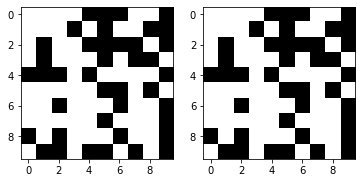

In [186]:
import matplotlib.pyplot as plt

fig = plt.figure()
sp1 = plt.subplot(121)
sp2 = plt.subplot(122)
sp1.imshow(ytest, cmap = plt.cm.gray, interpolation = 'nearest')
sp2.imshow(image, cmap = plt.cm.gray, interpolation = 'nearest')

In [187]:
np.mean(test_accuracy)

0.8559090909090908

In [156]:
tot = 0

for i,elmnt in enumerate(stimuli) :
    print(np.sum(elmnt))

-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
46.0
46.0
46.0
-100.0
-100.0
-100.0
59.0
59.0
59.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
53.0
53.0
53.0
-100.0
-100.0
-100.0
40.0
40.0
40.0
-100.0
-100.0
-100.0
49.0
49.0
49.0
-100.0
-100.0
-100.0
59.0
59.0
59.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
55.0
55.0
55.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
57.0
57.0
57.0
-100.0
-100.0
-100.0
55.0
55.0
55.0
-100.0
-100.0
-100.0
43.0
43.0
43.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
51.0
51.0
51.0
-100.0
-100.0
-100.0
45.0
45.0
45.0
-100.0
-100.0
-100.0
61.0
61.0
61.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
50.0
50.0
50.0
-100.0
-100.0
-100.0
54.0
54.0
54.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
-100.0
53.0
53.0
53.0
-100.0
-100.0
-100.0
57.0
57.0
57.0
-100.0
-10

## Second step: Encoding

In [18]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import KFold

cv = KFold(n_splits=10)

# Fit ridge model, calculate predictions on left out data
# and evaluate r^2 score for each voxel
scores = []
for train, test in tqdm(cv.split(y_train)):
    pred = (Ridge(alpha=100.).fit(y_train[train], X_train[train]).predict(y_train[test]))
    X_true = X_train[test]
    scores.append(1. - ((X_true - pred)** 2).sum(axis=0) /((X_true - X_true.mean(axis=0))** 2).sum(axis=0))
mean_scores = np.mean(scores, axis=0)


10it [00:01,  7.06it/s]


In [19]:
from sklearn.linear_model import LassoLarsCV
# choose number of voxels to treat, set to None for all voxels
n_voxels = 50
# choose best voxels
indices = mean_scores.argsort()[::-1][:n_voxels]
lasso = LassoLarsCV(max_iter=10)
receptive_fields = [] 
for index in indices:
    lasso.fit(y_train, X_train[:, index])
    receptive_fields.append(lasso.coef_.
        reshape(10, 10))